In [1]:
from keras.applications.vgg16 import VGG16
model = VGG16()
model.summary()

553476096/553467096 [==============================] - 283s 1us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                          

In [36]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions

image = load_img('cat1.jpg', target_size=(224, 224))
image = img_to_array(image)
image.shape

(224, 224, 3)

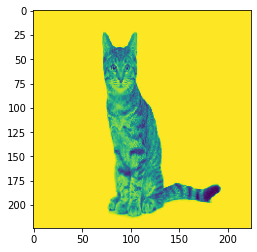

In [37]:
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 
imgplot = plt.imshow(image[:,:,0])
plt.show()

In [38]:
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
image = preprocess_input(image)

In [39]:
y_pred = model.predict(image)
label = decode_predictions(y_pred)
print(label)

[[('n02124075', 'Egyptian_cat', 0.8125725), ('n02123045', 'tabby', 0.12826392), ('n02123159', 'tiger_cat', 0.03468565), ('n02127052', 'lynx', 0.004487301), ('n01689811', 'alligator_lizard', 0.0013789203)]]


In [41]:
print(f"Breed = {label[0][0][1]}, Probability = {label[0][0][2] * 100}")

Breed = Egyptian_cat, Probability = 81.25724792480469


In [65]:
from keras.models import Model 
from keras.layers import Dense 
from keras.layers import Flatten

model2 = VGG16(include_top=False, input_shape=(32, 32, 3))
for layer in model2.layers:
    layer.trainable = False 
# add new classifier layers 
flat1 = Flatten()(model2.layers[-1].output)
class1 = Dense(1024, activation="relu")(flat1)
output = Dense(10, activation="softmax")(class1)
model3 = Model(inputs=model2.inputs, outputs=output)
model3.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0   

In [88]:
from tensorflow import keras 
import numpy as np 
num_classes = 10
input_shape = (32, 32, 3)
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [89]:
X_train_reshaped = []
for x in X_train:
    x = np.pad(x, 2)
    tmp = np.dstack([x, x, x])
    X_train_reshaped.append(tmp)
X_train = np.asarray(X_train_reshaped)

X_test_reshaped = []
for x in X_test:
    x = np.pad(x, 2)
    tmp = np.dstack([x, x, x])
    X_test_reshaped.append(tmp)
X_test = np.asarray(X_test_reshaped)
X_train.shape

(60000, 32, 32, 3)

In [90]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [91]:
model3.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model3.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=0.1)

Epoch 1/3
422/422 [==============================] - 108s 256ms/step - loss: 1.0121 - accuracy: 0.7845 - val_loss: 0.5400 - val_accuracy: 0.8230
Epoch 2/3
422/422 [==============================] - 104s 246ms/step - loss: 0.4532 - accuracy: 0.8486 - val_loss: 0.4956 - val_accuracy: 0.8333
Epoch 3/3
422/422 [==============================] - 105s 250ms/step - loss: 0.3562 - accuracy: 0.8729 - val_loss: 0.4585 - val_accuracy: 0.8470


In [93]:
score = model3.evaluate(X_test, y_test)
print(f"Test loss: {score[0]}")
print(f"Test accuracy: {score[1]}")

313/313 [==============================] - 19s 61ms/step - loss: 0.4765 - accuracy: 0.8374
Test loss: 0.47654253244400024
Test accuracy: 0.8374000191688538
